# Customer Reliability Research

Project Description:

The customer is the credit department of the bank. It is necessary to find out whether the marital status and the number of children of the client affect the fact of repaying the loan on time. Input data from the bank - statistics on the solvency of customers.
The results of the study will be taken into account when building a credit scoring model - a special system that assesses the ability of a potential borrower to return a loan to a bank.

Data Description:

children — number of children in the family;

days_employed - total work experience in days;

dob_years - client's age in years

education — the level of education of the client

education_id — education level identifier

family_status - marital status

family_status_id - marital status identifier

gender - gender of the client

income_type - type of employment

debt - whether he had debt to repay loans

total_income - monthly income

purpose — the purpose of obtaining a loan

Part of the data is presented in Russian. Nevertheless, all stages of the project and conclusions have been translated for the convenience of everyone who is interested in my work.

## 1. Let's check what we've got!

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## 2. Data preprocessing

In [4]:
# deletion of gaps

print(data.isna().sum())

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


In [5]:
# let's fill in the missing values in the column "total_income" with the median values by type of employment ("income_type").

median_total = data.groupby('income_type')['total_income'].median()
uniq_type = data['income_type'].unique()
for value in uniq_type:
    data.loc[(data['total_income'].isna()) & (data['income_type'] == value), 'total_income'] = median_total[value]

In [6]:
# let's remove negative values from a column "days_employed".

data['days_employed'] = data['days_employed'].abs()

In [7]:
days_employed_median = data.groupby('income_type')['days_employed'].median()
print(days_employed_median)

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64


There are abnormally large values in two columns. These data are not required for our study, so let's not waste time and leave everything as it is.

In [8]:
print(data['children'].unique())

[ 1  0  3  2 -1  4 20  5]


The column 'children' contains negative values. Let's get rid of them.

In [9]:
data = data.loc[(data['children'] != -1) & (data['children'] != 20)]
print(data['children'].unique())

[1 0 3 2 4 5]


Let's fill in the gaps in the column 'days_employed' with the median values by 'income_type'.

In [10]:
median_days = data.groupby('income_type')['days_employed'].median()
uniq_type = data['income_type'].unique()
for value in uniq_type:
    data.loc[(data['days_employed'].isna()) & (data['income_type'] == value), 'days_employed'] = median_days[value]

In [11]:
# Check

print(data.isna().sum())

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64


In [12]:
# Lets change data type in 'total_income'.

data['total_income'] = data['total_income'].astype('int')

In [13]:
# let's add beauty.

data['education'] = data['education'].str.lower()

In [14]:
# let's deal with duplicates.

data.duplicated().sum()

71

In [15]:
data = data.drop_duplicates()

In [16]:
# Check

data.duplicated().sum()

0

## 3. Data categorization

In [17]:
# Let's assign a category depending on income.

def categorize_income(income):
    if income <= 30000:
        return 'E'
    if income <= 50000:
        return 'D'
    if income <= 200000:
        return 'C'
    if income <= 1000000:
        return 'B'
    return 'A'

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [19]:
# Let's categorize the purpose of lending.

print(data['purpose'].unique())

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


In [20]:
# Using the function, we divide the lending goals into 4 groups: Auto, Real Estate, Wedding and Education.

def categorize_purpose(purpose):
    if 'авто' in purpose:
        return 'операции с автомобилем'
    if 'жил' in purpose or 'движ' in purpose:
        return 'операции с недвижимостью'
    if 'свадь' in purpose:
        return 'проведение свадьбы'
    return 'получение образования'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

In [22]:
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C,операции с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем


## 4. Data exploration

### Hypotheses:

1. Does the repayment of the loan depend on the number of children?
2. Is there a positive correlation between marital status and loan repayment on time?
3. How do different purposes of a loan affect its repayment on time?

In [23]:
# hypothesis 1:

data.groupby('children')['debt'].agg(['mean','count','sum'])

,mean,count,sum
children,,,
0,0.075438,14091,1063
1,0.092346,4808,444
2,0.094542,2052,194
3,0.081818,330,27
4,0.097561,41,4
5,0.000000,9,0


The number of children the borrower has:
0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64


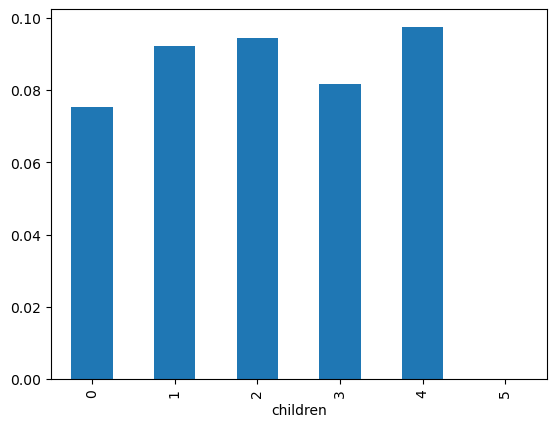

In [24]:
print('The number of children the borrower has:')
print(data['children'].value_counts());
debt_children_grouped = data.groupby('children')['debt'].mean();
debt_children_grouped.plot.bar(x='children', y='debt');

Conclusion:

My calculations show that the hypothesis about the existence of a positive correlation between the number of children and the repayment of loans is not confirmed. All groups are approximately equal in their unwillingness to return funds to the borrower. Perhaps the only interesting fact is that the childless are less likely than others to become debtors. The results in groups "4" and "5" are not representative due to insufficient data.

Number of borrowers by marital status:

женат / замужем          12261
гражданский брак          4134
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
Name: family_status, dtype: int64


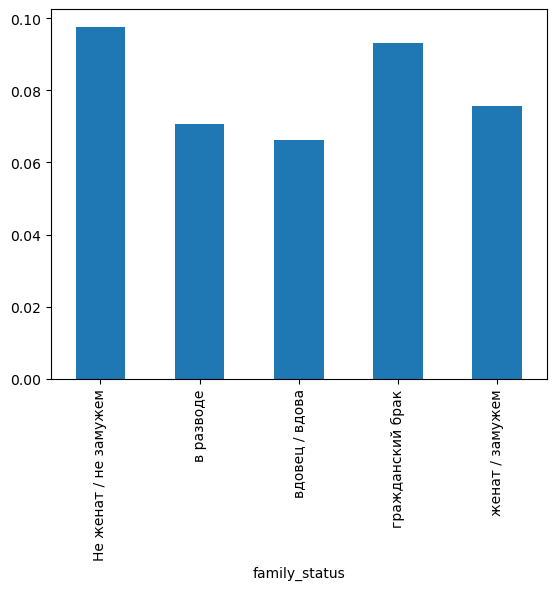

In [25]:
# hypothesis 2:

print('Number of borrowers by marital status:')
print()
print(data['family_status'].value_counts())
debt_status_grouped = data.groupby('family_status')['debt'].mean()
family_status_barplot = debt_status_grouped.plot.bar(x='family_status', y='debt')

Conclusion:

I wouldn’t call the results dependency, but it is possible to trace some trends:
- The most representative and "average" indicator can be considered as "married".
- People from the "divorced" and "widower/widow" groups i.e. Those who have gone through the official institution of marriage are more careful than others about borrowed money. At the same time, the data for the group is the smallest and with a similar number, the result could have been different.
- Citizens who have never had contact with marriage in terms of stamps and passports turn out to be the least responsible in financial matters.


What to say? Official marriage disciplines!)

Number of borrowers by lending purpose:

операции с недвижимостью    10751
операции с автомобилем       4279
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64


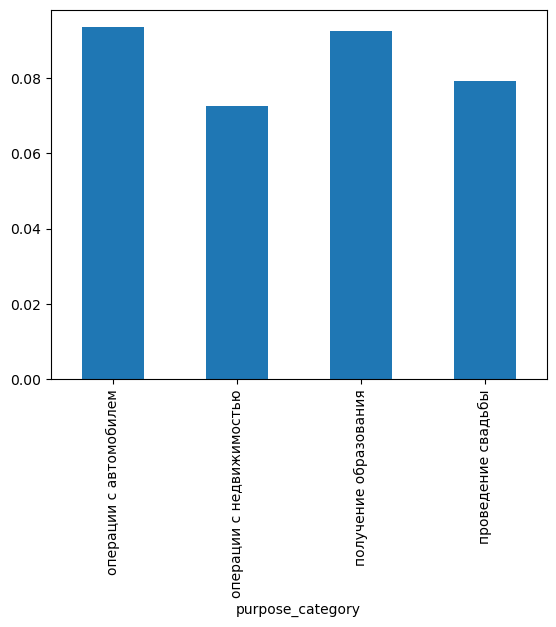

In [26]:
# hypothesis 3:
print('Number of borrowers by lending purpose:')
print()
print(data['purpose_category'].value_counts())
debt_purpose_grouped = data.groupby('purpose_category')['debt'].mean()
purpose_barplot = debt_purpose_grouped.plot.bar(x='purpose', y='debt')

Conclusion:

The result of the study shows two almost similar groups. Loans for weddings and real estate are returned more readily than loans taken for education and cars. I can assume that loans for weddings are usually small and are returned relatively quickly, since newlyweds are often given money. With regard to real estate transactions, this type of lending in most cases is a mortgage and is secured by the acquired property. This fact in itself forces borrowers to be very attentive to their obligations. Auto and education loans are generally not backed by substantial collateral or guarantees, which in itself makes them less likely to be repaid. I believe that the value of the asset to the owner is an important factor in the repayment of the loan. The value of education is relative and individual, and cars get into accidents and lose value quite often.

## 5. Conclusion

In the process of working on the project, the following stages were passed:
    
1. Data preprocessing (detection and replacement of gaps, processing of "artifacts", changing data types, processing of duplicates).
2. Categorization of data for further analysis.
3. Research.

The following conclusions can be considered as the result of the work done:
    
1. The number of children the borrower has does not affect the repayment of loans.
2. Marital status affects the repayment of loans. People who have been married are the most responsible borrowers, while single people are more likely to become defaulters.
3. The level of income of the borrower does not affect the repayment of loans.
4. Loans taken for different purposes are returned with different frequency. Loans for housing purposes and weddings are repaid more often than car loans and student loans.
    
Recommendations:
    
More attention needs to be paid to borrowers who apply for car loans and education loans. Especially if single, usually younger, people come for these loan products. It is worth considering the possibility of such borrowers providing guarantees as the most customer-friendly measure, as opposed to providing property as collateral.